<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Весна 2021</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [144]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [159]:
test = pd.read_csv("test.csv")
data = pd.read_csv('./train.csv')

In [160]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [130]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [14]:
data.isna().sum()   # Nans numbers

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

array([[<AxesSubplot:title={'center':'ClientPeriod'}>,
        <AxesSubplot:title={'center':'MonthlySpending'}>],
       [<AxesSubplot:title={'center':'IsSeniorCitizen'}>,
        <AxesSubplot:title={'center':'Churn'}>]], dtype=object)

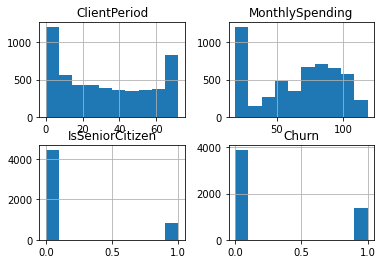

In [24]:
data.hist()

In [128]:
data[cat_cols].head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [41]:
print(len(cat_cols))

16


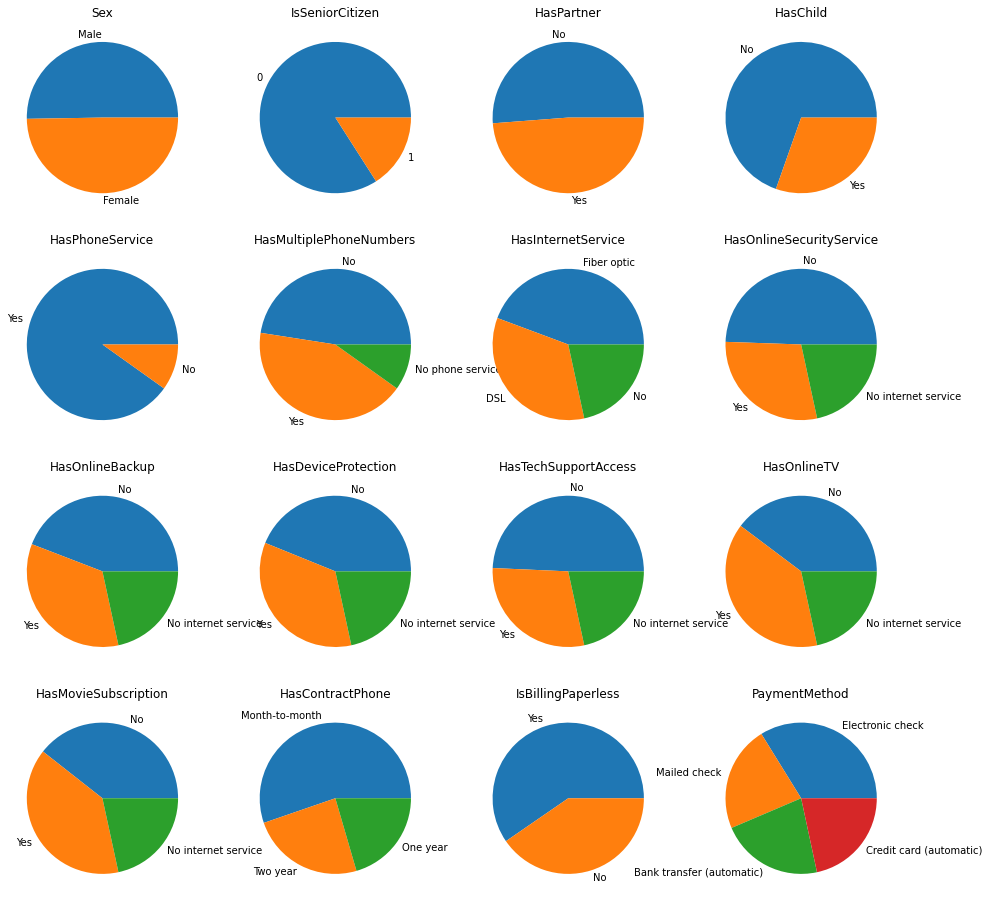

In [59]:
plt.figure(figsize=(16, 16))
for col, i in zip(cat_cols, range(len(cat_cols))):
    plt.subplot(4, 4, i+1)
    plt.title(col)
    counts = data[col].value_counts()
    plt.pie(counts, labels=counts.index)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

([<matplotlib.patches.Wedge at 0x195cfd7f2b0>,
 [Text(-0.7478930722742168, 0.8066324766857788, '0'),
  Text(0.7478930722742166, -0.8066324766857789, '1')])

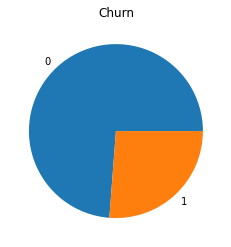

In [61]:
col = target_col
plt.title(col)
counts = data[col].value_counts()
plt.pie(counts, labels=counts.index)

array([[<AxesSubplot:xlabel='ClientPeriod', ylabel='ClientPeriod'>,
        <AxesSubplot:xlabel='MonthlySpending', ylabel='ClientPeriod'>,
        <AxesSubplot:xlabel='TotalSpent', ylabel='ClientPeriod'>,
        <AxesSubplot:xlabel='IsSeniorCitizen', ylabel='ClientPeriod'>,
        <AxesSubplot:xlabel='Churn', ylabel='ClientPeriod'>],
       [<AxesSubplot:xlabel='ClientPeriod', ylabel='MonthlySpending'>,
        <AxesSubplot:xlabel='MonthlySpending', ylabel='MonthlySpending'>,
        <AxesSubplot:xlabel='TotalSpent', ylabel='MonthlySpending'>,
        <AxesSubplot:xlabel='IsSeniorCitizen', ylabel='MonthlySpending'>,
        <AxesSubplot:xlabel='Churn', ylabel='MonthlySpending'>],
       [<AxesSubplot:xlabel='ClientPeriod', ylabel='TotalSpent'>,
        <AxesSubplot:xlabel='MonthlySpending', ylabel='TotalSpent'>,
        <AxesSubplot:xlabel='TotalSpent', ylabel='TotalSpent'>,
        <AxesSubplot:xlabel='IsSeniorCitizen', ylabel='TotalSpent'>,
        <AxesSubplot:xlabel='Churn', ylab

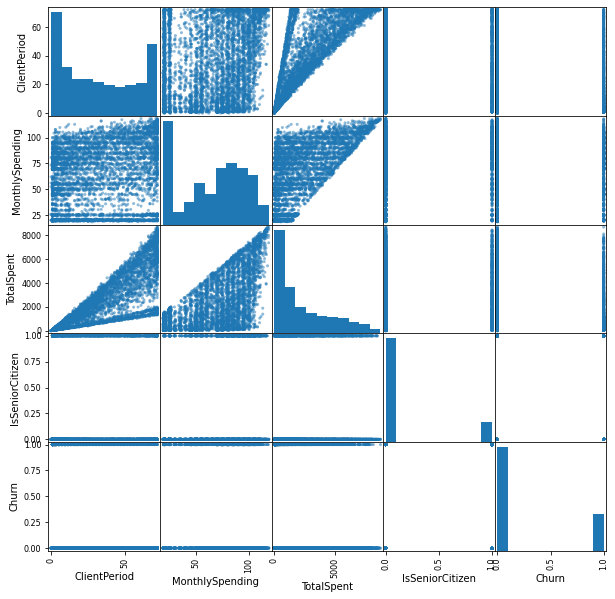

In [129]:
pd.plotting.scatter_matrix(data, figsize=(10,10))

In [ ]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

## cat features encoding

In [161]:
data = pd.get_dummies(data, columns=cat_cols)
test = pd.get_dummies(test, columns=cat_cols)
data.head

<bound method NDFrame.head of       ClientPeriod  MonthlySpending TotalSpent  Churn  Sex_Female  Sex_Male  \
0               55            19.50    1026.35      0           0         1   
1               72            25.85     1872.2      0           0         1   
2                1            75.90       75.9      1           0         1   
3               32            79.30       2570      0           1         0   
4               60           115.25    6758.45      0           1         0   
...            ...              ...        ...    ...         ...       ...   
5277             3            30.40      82.15      0           0         1   
5278            50            44.45    2188.45      0           0         1   
5279             1            55.05      55.05      0           0         1   
5280            29            76.00    2215.25      0           1         0   
5281            19            75.90     1375.6      0           1         0   

      IsSeniorCitizen

In [162]:
cat_cols_new = []
for col_name in cat_cols:
    cat_cols_new.extend(filter(lambda x: x.startswith(col_name), data.columns))
cat_cols = cat_cols_new
cat_cols

['Sex_Female',
 'Sex_Male',
 'IsSeniorCitizen_0',
 'IsSeniorCitizen_1',
 'HasPartner_No',
 'HasPartner_Yes',
 'HasChild_No',
 'HasChild_Yes',
 'HasPhoneService_No',
 'HasPhoneService_Yes',
 'HasMultiplePhoneNumbers_No',
 'HasMultiplePhoneNumbers_No phone service',
 'HasMultiplePhoneNumbers_Yes',
 'HasInternetService_DSL',
 'HasInternetService_Fiber optic',
 'HasInternetService_No',
 'HasOnlineSecurityService_No',
 'HasOnlineSecurityService_No internet service',
 'HasOnlineSecurityService_Yes',
 'HasOnlineBackup_No',
 'HasOnlineBackup_No internet service',
 'HasOnlineBackup_Yes',
 'HasDeviceProtection_No',
 'HasDeviceProtection_No internet service',
 'HasDeviceProtection_Yes',
 'HasTechSupportAccess_No',
 'HasTechSupportAccess_No internet service',
 'HasTechSupportAccess_Yes',
 'HasOnlineTV_No',
 'HasOnlineTV_No internet service',
 'HasOnlineTV_Yes',
 'HasMovieSubscription_No',
 'HasMovieSubscription_No internet service',
 'HasMovieSubscription_Yes',
 'HasContractPhone_Month-to-month',


In [163]:
data[num_cols].dtypes

ClientPeriod         int64
MonthlySpending    float64
TotalSpent          object
dtype: object

In [166]:
pd.Series(map(len, data["TotalSpent"])).value_counts()

6    2127
7    1615
5    1019
4     418
3      64
2      30
1       9
dtype: int64

In [167]:
data[pd.Series(map(len, data["TotalSpent"]))==1]

,ClientPeriod,MonthlySpending,TotalSpent,Churn,Sex_Female,Sex_Male,IsSeniorCitizen_0,IsSeniorCitizen_1,HasPartner_No,HasPartner_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1048,0,25.75,,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,0,1
1707,0,73.35,,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,1
2543,0,19.70,,0,0,1,1,0,0,1,...,0,0,1,0,0,1,0,0,0,1
3078,0,80.85,,0,1,0,1,0,0,1,...,1,0,0,1,1,0,0,0,0,1
3697,0,20.00,,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,1
4002,0,61.90,,0,0,1,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
4326,0,25.35,,0,0,1,1,0,0,1,...,0,0,0,1,1,0,0,0,0,1
4551,0,52.55,,0,1,0,1,0,0,1,...,0,0,0,1,0,1,1,0,0,0
4598,0,56.05,,0,1,0,1,0,0,1,...,0,0,0,1,1,0,0,1,0,0


In [168]:
f"{data.iloc[1048]['TotalSpent']}"

' '

In [101]:
data.loc[[1048,
1707,
2543,
3078,
3697,
4002,
4326,
4551,
4598], "TotalSpent"] = 0

In [121]:
for i in np.where(pd.Series(map(len, data["TotalSpent"]))==1)[0]:
    print(i)
np.where(pd.Series(map(len, data["TotalSpent"]))==1)[0]

1048
1707
2543
3078
3697
4002
4326
4551
4598


array([1048, 1707, 2543, 3078, 3697, 4002, 4326, 4551, 4598], dtype=int64)

In [172]:
data.loc[np.where(pd.Series(map(len, data["TotalSpent"]))==1)[0], "TotalSpent"] = 0
test.loc[np.where(pd.Series(map(len, test["TotalSpent"]))==1)[0], "TotalSpent"] = 0

In [173]:
data = data.astype({"TotalSpent": float})
test = test.astype({"TotalSpent": float})

In [125]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [174]:
data["constant"] = 1
test["constant"] = 1

In [155]:
feature_cols = num_cols + cat_cols + ['constant']
X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], data[target_col], test_size=0.2)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)# YOUR CODE
X_train[:, -1] = 1
X_test = scaler.transform(X_test)# YOUR CODE
X_test[:, -1] = 1
X_train

array([[ 0.38023358,  1.32124417,  0.99706121, ..., -0.70359505,
        -0.54553132,  1.        ],
       [-0.7563838 ,  0.50444834, -0.5141196 , ..., -0.70359505,
        -0.54553132,  1.        ],
       [-1.16231858, -1.4674123 , -0.97387718, ..., -0.70359505,
        -0.54553132,  1.        ],
       ...,
       [ 0.94854228, -1.34365536, -0.38552889, ..., -0.70359505,
         1.83307532,  1.        ],
       [-0.47222946, -0.16218906, -0.46117305, ...,  1.42127207,
        -0.54553132,  1.        ],
       [ 0.62379445, -1.16379526, -0.40425442, ..., -0.70359505,
        -0.54553132,  1.        ]])

In [156]:
linreg = LogisticRegression()
linreg.fit(X_train, y_train)

LogisticRegression()

In [157]:
roc_auc_score(y_test, linreg.predict(X_test))
# with constant
# 0.7087499882632414

0.7087499882632414

In [146]:
#roc_auc_score(y_test, linreg.predict(X_test))
# 0.6959138422553057
# without constant

0.6959138422553057

In [175]:
 # Full data set training
feature_cols = num_cols + cat_cols + ['constant']
scaler = StandardScaler()
X_train = data[feature_cols]
y_train = data[target_col]
scaler.fit(X_train)
X_train = scaler.transform(X_train)# YOUR CODE
X_train[:, -1] = 1
test = scaler.transform(test)# YOUR CODE
test[:, -1] = 1
X_train

array([[ 0.92076704, -1.50544655, -0.55585201, ..., -0.7147514 ,
         1.85034743,  1.        ],
       [ 1.61328776, -1.29499774, -0.18303943, ..., -0.7147514 ,
        -0.54043905,  1.        ],
       [-1.27900465,  0.36373662, -0.97476756, ...,  1.39908785,
        -0.54043905,  1.        ],
       ...,
       [-1.27900465, -0.32726461, -0.9839573 , ..., -0.7147514 ,
         1.85034743,  1.        ],
       [-0.13838229,  0.36705077, -0.03183845, ..., -0.7147514 ,
        -0.54043905,  1.        ],
       [-0.54574742,  0.36373662, -0.40191834, ..., -0.7147514 ,
         1.85034743,  1.        ]])

In [189]:
roc_auc_score(y_train, linreg.predict_proba(X_train)[:, 1])

0.8481387372211036

In [191]:
result = linreg.predict_proba(test)[:, 1]
result

array([0.03257819, 0.72757579, 0.69804377, ..., 0.75855534, 0.66946821,
       0.01023886])

In [192]:
resultDF = pd.DataFrame({"Churn": result})
# resultDF.columns= ['Id', "Churn"]
resultDF.head()

,Churn
0,0.032578
1,0.727576
2,0.698044
3,0.004884
4,0.001405


In [193]:
resultDF.to_csv("first_proba_result.csv", index_label="Id")

## С простым способом закончили. Теперь будем делать pipeline

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [ ]:
# YOUR CODE

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
best_model = # какая-то предыдущая модель

SyntaxError: invalid syntax (<ipython-input-12-7d881febecc7>, line 1)

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = # best_model.predict_proba(X_test) / best_model.predict(X_test)
submission.to_csv('./my_submission.csv')

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.